## Forward Propagation

$$
\hat y = \sigma (Wx+b)
$$


- $y$: Truth label which is either 0 or 1
- $\hat y$: Prediction or probability on a scale of 0 .. 1, $\sigma (Wx+b)$
- $w_i$: Weight value from previous activation layer perceptron
- b: Bias
- $x_i$ or $a_i$: activation from a previous perceptron layer, $\hat y$
- perceptron: The perceptron is a simplified model of a biological neuron and another name for activation, $\hat y$ 
- $\sigma$: Activation function. There are many types and this is the simplest. Other examples are ReLU or tanh, $\sigma = 1/(1+e^{-x})$


## Gradient Decent

- minimize cost function ($C$), which is the negative of the gradient: $-\nabla C$ 
    - $C$ must be continuous and differentiable 
    - Cost is calculated as: $\sum_{i=0}^{n-1} (y_i - truth_i)$
    - Typically there is a learning rate added (\eta) to control convergence speed: $- \eta \nabla C$ 
    - Step size is a function of slope to minimize overshooting a local minimum
- When updating, you adjust your weights and bias based on the sign and magnitude
    - $-\nabla C = [-1 -0.3 5.6 -0.001 \dots]$ where the -1 tells us to decrease the weights/bias for that output while the +5.6 tells us to increase the wieghts/bias for that output
    - Also, the +5.6 is more important (has a greater effect) on the network output than the -0.001
    
## Cross Entropy

- Binary system (red/blue):

| | Control | BP Eqn | Def |
|---|---|---|---|
| activations | N | . | . |
| weights     | Y | . | value of weighted connections between perceptrons |
| bias        | Y | . | activation threshold |

## Maximum Likelihood

The probability ($\hat y$) of something is given by:

$$
\hat y = \sigma (Wx+b)
$$

## Cross Entropy

Since the probability is a value between 0 - 1, the log will be negative, so we correct this by taking the negative, so we get  a positive number. This connects probability and *error function* together.

$$
\sum - \ln(\hat y)
$$

- small cross entropy: event and probability are likely
- high cross entropy: event and probability are unlikely

## Gradient Descent with Squared Errors

$$
E_{SSE} = \frac{1}{2}\sum_{\mu} \sum_j \left[ y^{\mu}_j - \hat{y}^{\mu}_j \right]^2 \\
E_{MSE} = \frac{1}{2m}\sum_{\mu} \left[ y^{\mu} - \hat{y}^{\mu} \right]^2
$$

where SSE is the sum of the squared error, MSE is mean of the squared error, $\hat y$ is the prediction and y is the true value, and you take the sum over all output units j and another sum over all data points $\mu$. 

- SSE is always posative
- SSE penalizes large errors more than small errors

## Gradient Decent

$$
\Delta w_{ij} = \eta \delta_j x_i \\
\delta = (y - \hat y) f'(h) = (y - \hat y) f'( \sum w_i x_i) \\
h = \sum w x_i
$$

where $\delta$ is the error term, $(y - \hat y)$ is the output error, and $f'(h)$ refers to the derivative of the activation function, $f(h)$. Now for $f(h)$ we will use the sigmoid.

```python
# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input data
x = np.array([0.1, 0.3])
# Target
y = 0.2
# Input to output weights
weights = np.array([-0.8, 0.5])

# The learning rate, eta in the weight step equation
learnrate = 0.5

# the linear combination performed by the node (h in f(h) and f'(h))
h = x[0]*weights[0] + x[1]*weights[1]
# or h = np.dot(x, weights)

# The neural network output (y-hat)
nn_output = sigmoid(h)

# output error (y - y-hat)
error = y - nn_output

# output gradient (f'(h))
output_grad = sigmoid_prime(h)

# error term (lowercase delta)
error_term = error * output_grad

# Gradient descent step 
del_w = [ learnrate * error_term * x[0],
          learnrate * error_term * x[1]]
# or del_w = learnrate * error_term * x
```

Here's the general algorithm for updating the weights with gradient descent:

1. Set the weight step to zero: $\Delta w_i = 0$
1. For each record in the training data:
    1. Make a forward pass through the network, calculating the output $\hat y = f(\sum_i w_i x_i)$
    1. Calculate the error term for the output unit, $\delta = (y - \hat y) * f'(\sum_i w_i x_i)$
    1. Update the weight step $\Delta w_i = \Delta w_i + \delta x_i$
1. Update the weights $w_i = w_i + \eta \Delta w_i / m$ where $\eta$ is the learning rate and $m$ is the number of records. Here we're averaging the weight steps to help reduce any large variations in the training data.
1. Repeat for $e$ epochs.

where the activation signal is the sigmoid function $f(h)=1/(1+e^−h)$, $f'(h)=f(h)(1−f(h))$

Initialize weights with:

```python
# Number of records and input units
n_records, n_inputs = features.shape
# Number of hidden units
n_hidden = 2
weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))
```

## Multi-Layer BP

$$
\Delta w_{ij} = \eta \delta_j x_i
$$

where i is for each node in a previous layer and j is for each node of the next layer.

output layer: $\delta_k = (y_k-\hat y_k)f'(h_k)$
hidden layers:

**see implementing bp**

- [Yes you should understand backprop](https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b#.vt3ax2kg9)
- [CS231n Winter 2016 Lecture 4 Backpropagation, Neural Networks](https://www.youtube.com/watch?v=59Hbtz7XgjM)

- Stochastic Gradient Decent: large datasets require lots of computational power and memory to train a NN. The training requirements can be reduced if you break a large dataset up into smaller datasets and train in batches. The performance of each batch won't be as good as the one large dataset, but it will still work faster and with reduced requirements. 

## Momentum

- Helps prevent getting stuck in local minimum when doing gradient decent
- $\beta$: momentum value
- Weight each step: $step_n = step_n + \beta step_{n-1} + \beta^2 step_{n-2} + \dots$

## One Hot Encoding

Turning labels into numbers without impling importance between them.

<img src="pics/one-hot-encoding.png" width="400px">

In [13]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('../labs/student-admissions/student_data.csv')
print("Original dataframe")
print(data.head())
print('')

# do one-hot-encoding on class rank and drop the old rank column
one_hot_data = pd.merge(
    left=data, 
    right=pd.get_dummies(data['rank']),
    left_index=True,
    right_index=True).drop(columns="rank")

print("New dataframe")
print(one_hot_data.head())

Original dataframe
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

New dataframe
   admit  gre   gpa  1  2  3  4
0      0  380  3.61  0  0  1  0
1      1  660  3.67  0  0  1  0
2      1  800  4.00  1  0  0  0
3      1  640  3.19  0  0  0  1
4      0  520  2.93  0  0  0  1


## Activation functions

The first activation function you typically learn is the sigmoid function given by:

$$
\sigma(h)=1/(1+e^−h)
$$ 

It is typically not used in deep learning, but, it has a nice derivative, which is: 

$$
\sigma'(h)=\sigma(h)(1−\sigma(h))
$$

- **Vanishing Gradient Problem:** the sigmoid function in back propagation has a maximum value of 0.25 and therefore reduces the change by 75%. If a network has a lot of hidden layers with sigmoids, then the weight updates will be reduced by 75% in *each* layer of the network and eventually reduces to 0 as more hidden layers are added. This is why for deep learning networks, we won't use this.
    - See sigmoid prime function plot below showing the maximum value is 0.25.

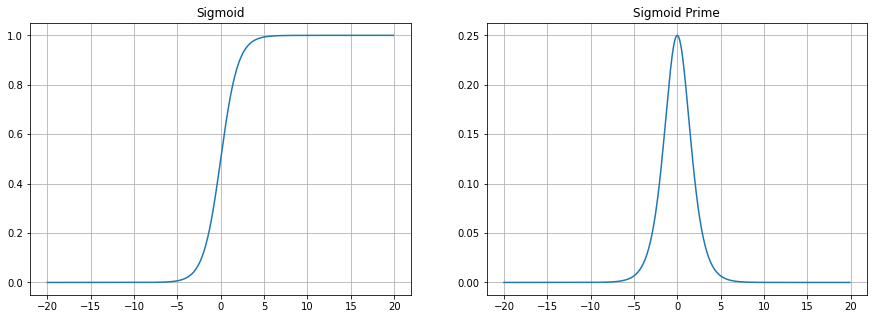

In [12]:
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.arange(-20,20,0.1)
s = sigmoid(x)
sp = sigmoid_prime(x)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(x,s)
plt.title("Sigmoid")
plt.grid(True);

plt.subplot(1,2,2)
plt.plot(x,sp)
plt.title("Sigmoid Prime")
plt.grid(True);